# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

c:\Users\tempe\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tempe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_api_key = "a792d083b5f848998cc4a237f0878ce9"

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_articles

{'status': 'ok',
 'totalResults': 10373,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id':

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
eth_articles


{'status': 'ok',
 'totalResults': 4564,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': '‘Axie Infinity’ hack victims will only get back around a third of what they lost',
   'description': 'Sky Mavis, the developer of blockchain game Axie Infinity, says it will start reimbursing the victims of a $617 million hack that took place earlier this year. The attackers took $25.5 million in USDC (a stablecoin that’s pegged to the value of the US dollar)…',
   'url': 'https://www.engadget.com/games-gaming-axie-infinity-cryptocurrency-sky-mavis-ethereum-202421647.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-06/1a4e7b40-f3f9-11ec-bef2-f746fceaf0c8',
   'publishedAt': '2022-06-24T20:24:21Z',
   'content': 'Sky Mavis, the developer of blockchain game Axie Infinity, says it will start reimbursing the victims of a $617 million hack that took place earlier this year. The attackers took $25.5 million in USD… [+1494 ch

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc_df  = pd.DataFrame(sentiments)
btc_df.head()


,text,Compound,Positive,Negative,Neutral
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth_df  = pd.DataFrame(sentiments)
eth_df.head()


,text,Compound,Positive,Negative,Neutral
0,"Sky Mavis, the developer of blockchain game Ax...",-0.7184,0.000,0.154,0.846
1,"Jim Cramer, the CNBC host whos reportedly wort...",0.5106,0.107,0.000,0.893
2,"The price of Ethereum has dropped below $1,250...",0.2732,0.063,0.000,0.937
3,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
4,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.00000,100.000000,100.00000
mean,-0.001835,0.06583,0.066560,0.86768
std,0.437896,0.06777,0.069682,0.08353
min,-0.948500,0.00000,0.000000,0.62800
25%,-0.361200,0.00000,0.000000,0.82175
50%,0.000000,0.06400,0.064000,0.86700
75%,0.361200,0.11050,0.104000,0.92075
max,0.865500,0.26900,0.372000,1.00000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.064064,0.077250,0.058400,0.864300
std,0.484785,0.077089,0.069395,0.086668
min,-0.948500,0.000000,0.000000,0.604000
25%,-0.381800,0.000000,0.000000,0.814000
50%,0.000000,0.066500,0.048500,0.866500
75%,0.457950,0.123000,0.094000,0.925000
max,0.916900,0.349000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a higher mean score by almost .0118

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score as well.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [13]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df

,text,Compound,Positive,Negative,Neutral,tokens
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."
1,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[Rapper, entrepreneur, Shawn, Carter, better, ..."
2,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[Image, caption, President, Faustin-Archange, ..."
4,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, Bitcoin, digi..."
...,...,...,...,...,...,...
95,Critique: There are news reports all the time...,-0.5770,0.000,0.129,0.871,"[Critique, news, report, time, bitcoin, gettin..."
96,"Elon Musk, CEO of Tesla and SpaceX, is being s...",0.4019,0.070,0.000,0.930,"[Elon, Musk, CEO, Tesla, SpaceX, sued, 200, bi..."
97,Cybercriminals made off with $100 million in c...,0.4019,0.091,0.000,0.909,"[Cybercriminals, made, 100, million, cryptocur..."
98,June 14 (Reuters) - The crypto market's a hot ...,-0.6486,0.000,0.155,0.845,"[June, 14, Reuters, crypto, market, hot, mess,..."


In [14]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()


,text,Compound,Positive,Negative,Neutral,tokens
0,"Sky Mavis, the developer of blockchain game Ax...",-0.7184,0.000,0.154,0.846,"[Sky, Mavis, developer, blockchain, game, Axie..."
1,"Jim Cramer, the CNBC host whos reportedly wort...",0.5106,0.107,0.000,0.893,"[Jim, Cramer, CNBC, host, who, reportedly, wor..."
2,"The price of Ethereum has dropped below $1,250...",0.2732,0.063,0.000,0.937,"[price, Ethereum, dropped, 1,250, energy, pric..."
3,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, PayPal,..."
4,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, DAO,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)


[(('char', 'June'), 17),
 (('Reuters', 'Bitcoin'), 10),
 (('previous', 'close'), 7),
 (('crypto', 'lender'), 7),
 (('biggest', 'best-known'), 6),
 (('Bitcoin', 'dropped'), 6),
 (('char', 'LONDON'), 6),
 (('El', 'Salvador'), 5),
 (('hedge', 'fund'), 5),
 (('Celsius', 'Network'), 5),
 (('world', 'biggest'), 5),
 (('best-known', 'cryptocurrency'), 5),
 (('LONDON', 'June'), 5),
 (('char', 'Posted'), 5),
 (('Elon', 'Musk'), 5),
 (('cryptocurrency', 'market'), 5),
 (('char', 'Bitcoin'), 5),
 (('Three', 'Arrows'), 4),
 (('Arrows', 'Capital'), 4),
 (('Bitcoin', 'world'), 4)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)


[(('char', 'June'), 11),
 (('Ethereum', 'ETH'), 10),
 (('cryptocurrency', 'market'), 6),
 (('Reuters', 'Bitcoin'), 6),
 (('previous', 'close'), 6),
 (('biggest', 'best-known'), 6),
 (('Bitcoin', 'dropped'), 5),
 (('world', 'biggest'), 5),
 (('best-known', 'cryptocurrency'), 5),
 (('price', 'Ethereum'), 4),
 (('digital', 'asset'), 4),
 (('Three', 'Arrows'), 4),
 (('Arrows', 'Capital'), 4),
 (('Bitcoin', 'world'), 4),
 (('New', 'Consumer—'), 4),
 (('Consumer—', 'Dan'), 4),
 (('Dan', 'Frommer'), 4),
 (('Frommer', 'publication'), 4),
 (('publication', 'people'), 4),
 (('people', 'spend'), 4)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
top_10btc_words = tokenizer(btc_df.text.str.cat())
token_count(top_10btc_words, 10)


[('char', 96),
 ('Bitcoin', 44),
 ('June', 36),
 ('crypto', 34),
 ('Reuters', 34),
 ('cryptocurrency', 31),
 ('bitcoin', 24),
 ('market', 21),
 ('investor', 14),
 ('said', 11)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
top_10eth_words = tokenizer(eth_df.text.str.cat())
token_count(top_10eth_words, 10)

[('char', 94),
 ('crypto', 34),
 ('market', 25),
 ('Ethereum', 23),
 ('cryptocurrency', 23),
 ('Bitcoin', 18),
 ('year', 17),
 ('June', 15),
 ('time', 12),
 ('company', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

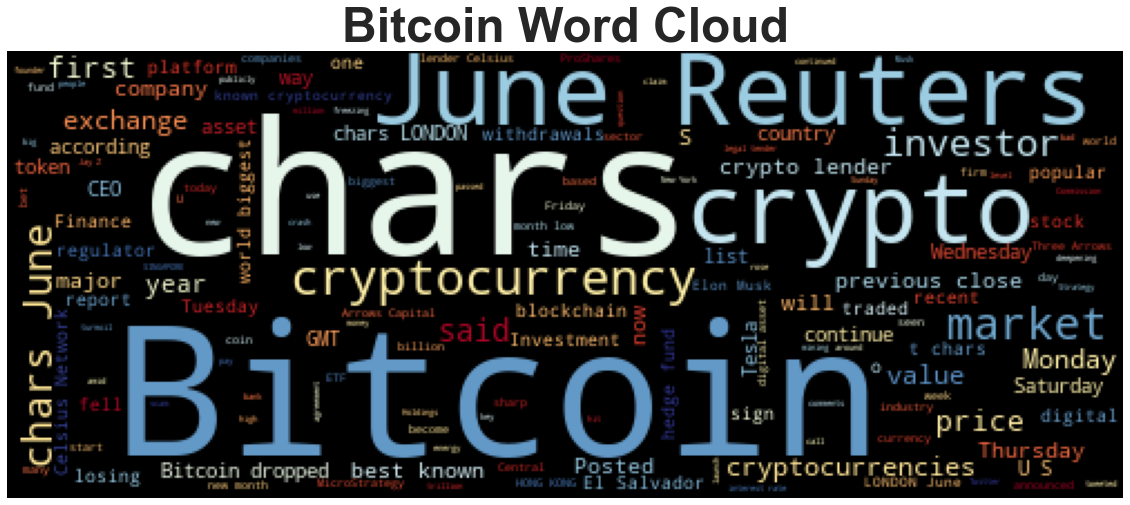

In [23]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    btcdf_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(btcdf_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")


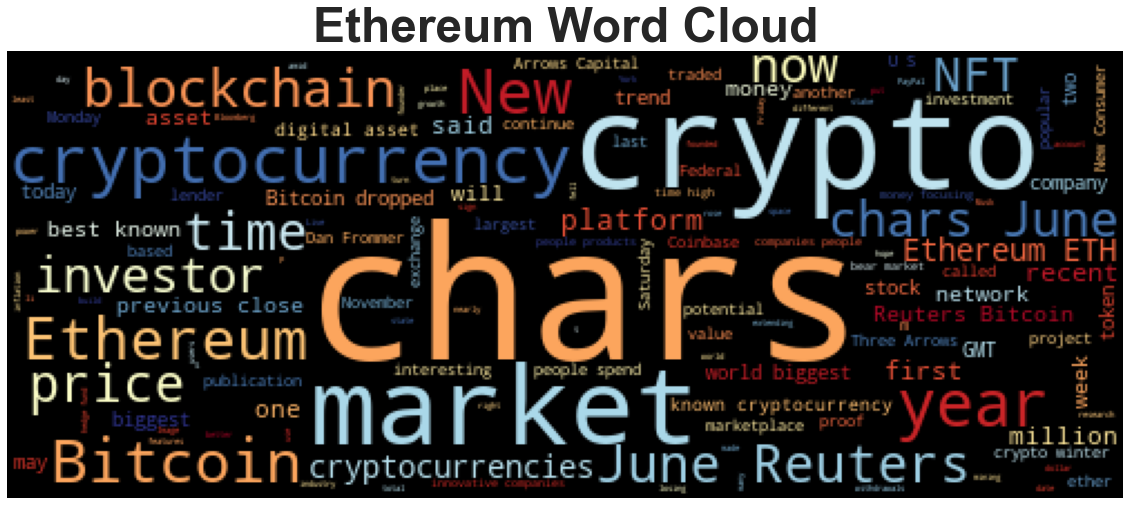

In [24]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df.text.str.cat()
btc_text


'New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It\'s now bound for the desk of… [+2036 chars]Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin A… [+2920 chars]A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars]Image caption, President Faustin-Archange Touadéra wants to rethink his country\'s economic philosophy\r\nThe Central African Republic\'s decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars]You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don\'t mind spending y

In [29]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER Process"

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)



New York GPE
Friday DATE
36 CARDINAL
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Twitter PRODUCT
Jack Dorsey PERSON
Rice PERSON
Faustin-Archange Touadéra ORG
The Central African Republic's ORG
Joe TidyCyber PERSON
Cryptocurrencies ORG
this week DATE
billions CARDINAL
Bitcoin PERSON
Salvador ORG
hundreds CARDINAL
last year DATE
J. Dubner PERSON
Freakonomics Radio ORG
Recommended Listening ORG
Freakonomics Radio ORG
three CARDINAL
+734 GPE
Chipotle PERSON
Arrows Capital ORG
Tuesday DATE
Virgin ORG
Paris GPE
The Celsius Network ORG
DeFi GPE
one CARDINAL
Investments ORG
the Securities and Exchange Commission ORG
US GPE
ETF ORG
Just an hour TIME
SEC ORG
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
2000 CARDINAL
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
2002 DATE
Monday DATE
3,218.95 MONEY
Bitcoin PERSON
51.6% PERCENT
June 14 DATE
Reuters ORG
Tuesday DATE
MicroStrategy Inc ORG
16 CARDINAL
Reuters ORG
7.03% PER

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.text.str.cat()
eth_text


'Sky Mavis, the developer of blockchain game Axie Infinity, says it will start reimbursing the victims of a $617 million hack that took place earlier this year. The attackers took $25.5 million in USD… [+1494 chars]Jim Cramer, the CNBC host whos reportedly worth at least $150 million, thinks Gen Z is buying too many $14 margaritas at the bar he owns in Brooklyn. And while were all for giving millionaire baby bo… [+3789 chars]The price of Ethereum has dropped below $1,250 while energy prices are skyrocketing. The average cost of electricity in states such as New England, Connecticut, Maine, Massachusetts, New Hampshire, a… [+1365 chars]The ability to conduct external transfers on PayPal\'s crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars]A decentralized autonomous organization, or DAO, is giving away two seats on a Blue Origin flight to space.\r\nThis is likely the first time no

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [35]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)


Sky Mavis PERSON
Axie Infinity GPE
$617 million MONEY
earlier this year DATE
$25.5 million MONEY
USD ORG
CNBC ORG
at least $150 million MONEY
Gen Z PERSON
Brooklyn GPE
Ethereum ORG
1,250 MONEY
New England LOC
Connecticut GPE
Maine GPE
Massachusetts GPE
New Hampshire GPE
PayPal ORG
today DATE
U.S. GPE
two CARDINAL
Blue Origin ORG
first ORDINAL
Ethereum Looks PERSON
Winklevoss ORG
Gemini GPE
winter DATE
Ethereum (Cryptocurrency ORG
ETH ORG
+3614 NORP
chars]New York GPE
Friday DATE
36 CARDINAL
eBay ORG
eBay ORG
today DATE
NFT ORG
KnownOrigin ORG
24/7 CARDINAL
one CARDINAL
18% PERCENT
about 1,100 CARDINAL
Arrows Capital ORG
Tuesday DATE
Virgin ORG
16 CARDINAL
Reuters ORG
7.03% PERCENT
20,969.32 MONEY
20:04 GMT TIME
Thursday DATE
1,585.95 MONEY
Bitcoin PERSON
56.5% PERCENT
18 CARDINAL
Reuters ORG
7.46% PERCENT
18,915.29 MONEY
Saturday DATE
1,525.41 MONEY
Bitcoin PERSON
60.8% PERCENT
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
2000 CARDINAL
Monday DATE
1,552.78 MONEY
34.8% PERCENT
ye

---